### Importing Packages and Loading the Datasets

In [1]:
#Import standard packages for data engineering and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import date, datetime

#import packages to support geo visuals
import folium
from folium.plugins import HeatMap
import json

#Import packages to perform linear regression modeling and preprocessing tools
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, plot_roc_curve, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#Import local functions from src/
import sys
sys.path.insert(0, 'src/')

#Ignore warnings in cells
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
# Import all related data sets

X = pd.read_csv('data/water_well_training_values.csv')
y = pd.read_csv('data/water_well_training_labels.csv')
df = pd.merge(y,X)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55765 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59400 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

### Get an understanding of the data

Thurough description of the key features, data types, possible problems that need to be solved with cleaning and some suggestions of feature engineering.

## Data Preparation

In [4]:
#check for duplicates in the data
df[df.duplicated()]

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group


We found no duplicate rows.

### Dealing with missing values 

In [5]:
# drop id column
df.drop('id',axis=1,inplace=True)

In [6]:
# Confirm the columns with missing values
df.isna().sum()

status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [7]:
# Fill NaN values according to appropriate method
df['funder'].value_counts()

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Muniko                       1
Pwc                          1
Tdrs                         1
Sisal Estste Hale            1
Sido                         1
Name: funder, Length: 1897, dtype: int64

In [8]:
df['funder'].fillna(value='missing',inplace =True)

In [9]:
df['funder'].isna().sum()

0

In [10]:
df['installer'].value_counts()

DWE               17402
Government         1825
RWE                1206
Commu              1060
DANIDA             1050
                  ...  
COYI                  1
VITECOS INVEST        1
Water /sema           1
Othod                 1
STABEX                1
Name: installer, Length: 2145, dtype: int64

In [11]:
df['installer'].fillna(value='missing',inplace=True)

In [12]:
df['subvillage'].value_counts()

Madukani        508
Shuleni         506
Majengo         502
Kati            373
Mtakuja         262
               ... 
Mkunguru          1
Katumba B         1
Kitokatoke        1
Mpome             1
Hindu Street      1
Name: subvillage, Length: 19287, dtype: int64

In [13]:
df['subvillage'].fillna(value='none',inplace=True)

In [14]:
df['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [15]:
df['public_meeting'].fillna(value=False,inplace=True)

In [16]:
df['public_meeting'].value_counts()

True     51011
False     8389
Name: public_meeting, dtype: int64

In [17]:
df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [18]:
df['scheme_management'].fillna(value='None',inplace=True)

In [19]:
df['scheme_name'].value_counts()

K                               682
None                            644
Borehole                        546
Chalinze wate                   405
M                               400
                               ... 
Kwasenenge Group                  1
The Desk and chair fondation      1
QUICK WINDS                       1
ISANJU WATER SCHEME               1
Hivuga Water Supply               1
Name: scheme_name, Length: 2696, dtype: int64

In [20]:
df.drop('scheme_name',axis=1,inplace=True)

In [21]:
df['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [22]:
df['permit'].fillna(value=False,inplace=True)

In [23]:
df.isna().sum()

status_group             0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
w

Explanation of why NaN values were filled using specific method

In [24]:
X_clean = df.drop('status_group',axis=1)

In [25]:
X_clean.isna().sum()

amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
w

### Converting Data Types

In [26]:
# Convert binary data to int type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           59400 non-null  object 
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 59400 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              59400 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59400 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

- date_recorded: object to datetime
- num_private: unkown feature
- 

In [27]:
# Drop uneccesary columns
df['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [28]:
df['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [29]:
df['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

We will not be using the ID column in exploratory analysis or modeling.

#### Dealing with outliers

In [30]:
# Check for outliers
df.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [31]:
df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [32]:
stat_map = {'functional':2,'functional needs repair':1,'non functional':0}
df['status_group'] = df['status_group'].map(stat_map)


In [33]:
df['status_group'].value_counts()

2    32259
0    22824
1     4317
Name: status_group, dtype: int64

Explanation of outliers, what makes them outliers and why they were dropped from the data. 

# Feature Engineering

Describe some features that could be engineered from the data and discuss which engineered features would be used in what models.

In [34]:
# cutting down on unique value types in the data
cat = X_clean.select_dtypes('object')

In [35]:
cols = cat.columns
X_clean[cols] = X_clean[cols].where(X_clean[cols].apply(lambda x: x.map(x.value_counts())) >= 50, 'other')

In [36]:
X_clean.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,other,Iringa,11,5,Ludewa,other,109,True,GeoData Consultants Ltd,VWC,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,0.0,2013-03-06,Grumeti,1399,other,34.698766,-2.147466,Zahanati,0,Lake Victoria,other,Mara,20,2,Serengeti,Natta,280,False,GeoData Consultants Ltd,Other,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,25.0,2013-02-25,other,686,World vision,37.460664,-3.821329,other,0,Pangani,Majengo,Manyara,21,4,Simanjiro,other,250,True,GeoData Consultants Ltd,VWC,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,other,0,Ruvuma / Southern Coast,other,Mtwara,90,63,Nanyumbu,other,58,True,GeoData Consultants Ltd,VWC,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,0.0,2011-07-13,other,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,other,Kagera,18,1,Karagwe,other,0,True,GeoData Consultants Ltd,None,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [37]:
X_clean.drop(['date_recorded'], axis = 1, inplace = True)

In [38]:
# drop datapoints with 0 longitude
X_clean = X_clean[X_clean['longitude'].notna()]
X_clean.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,other,Iringa,11,5,Ludewa,other,109,True,GeoData Consultants Ltd,VWC,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,0.0,Grumeti,1399,other,34.698766,-2.147466,Zahanati,0,Lake Victoria,other,Mara,20,2,Serengeti,Natta,280,False,GeoData Consultants Ltd,Other,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,25.0,other,686,World vision,37.460664,-3.821329,other,0,Pangani,Majengo,Manyara,21,4,Simanjiro,other,250,True,GeoData Consultants Ltd,VWC,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,0.0,Unicef,263,UNICEF,38.486161,-11.155298,other,0,Ruvuma / Southern Coast,other,Mtwara,90,63,Nanyumbu,other,58,True,GeoData Consultants Ltd,VWC,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,0.0,other,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,other,Kagera,18,1,Karagwe,other,0,True,GeoData Consultants Ltd,None,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [39]:
# Build functions here to .map to the data set, creating new columns with features
for i in X_clean.columns:
    print('{}: {}'.format(i,len(df[i].value_counts())))

amount_tsh: 98
funder: 1898
gps_height: 2428
installer: 2146
longitude: 57516
latitude: 57517
wpt_name: 37400
num_private: 65
basin: 9
subvillage: 19288
region: 21
region_code: 27
district_code: 20
lga: 125
ward: 2092
population: 1049
public_meeting: 2
recorded_by: 1
scheme_management: 12
permit: 2
construction_year: 55
extraction_type: 18
extraction_type_group: 13
extraction_type_class: 7
management: 12
management_group: 5
payment: 7
payment_type: 7
water_quality: 8
quality_group: 6
quantity: 5
quantity_group: 5
source: 10
source_type: 7
source_class: 3
waterpoint_type: 7
waterpoint_type_group: 6


In [40]:
# If applicable, drop original columns with features used to engineer new features

In [41]:
#Define get_season function to use in .map() to get the seasons.

Y = 2000 # dummy leap year to allow input X-02-29 (leap day)
seasons = [('winter', (date(Y,  1,  1),  date(Y,  3, 20))),
           ('spring', (date(Y,  3, 21),  date(Y,  6, 20))),
           ('summer', (date(Y,  6, 21),  date(Y,  9, 22))),
           ('autumn', (date(Y,  9, 23),  date(Y, 12, 20))),
           ('winter', (date(Y, 12, 21),  date(Y, 12, 31)))]

def get_season(date):
    if isinstance(date, datetime):
        date = date.date()
    date = date.replace(year=Y)
    return next(season for season, (start, end) in seasons
                if start <= date <= end)

Table with the new features and explanations of the physical parameters.

# Exploratory Data Analysis

### Table of Contents with the Types of Analyses Done

In [42]:
# Pre-Set the style of our charts
mpl.style.use('fivethirtyeight')

In [43]:
# Code with the relevant chart for the target feature.
continuous = df.select_dtypes(include=['int64','float64'])

In [44]:
continuous

,status_group,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
0,2,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999
1,2,0.0,1399,34.698766,-2.147466,0,20,2,280,2010
2,2,25.0,686,37.460664,-3.821329,0,21,4,250,2009
3,0,0.0,263,38.486161,-11.155298,0,90,63,58,1986
4,2,0.0,0,31.130847,-1.825359,0,18,1,0,0
...,...,...,...,...,...,...,...,...,...,...
59395,2,10.0,1210,37.169807,-3.253847,0,3,5,125,1999
59396,2,4700.0,1212,35.249991,-9.070629,0,11,4,56,1996
59397,2,0.0,0,34.017087,-8.750434,0,12,7,0,0
59398,2,0.0,0,35.861315,-6.378573,0,1,4,0,0


In [45]:
len(continuous.columns)

10

In [46]:
df['status_group']

0        2
1        2
2        2
3        0
4        2
        ..
59395    2
59396    2
59397    2
59398    2
59399    2
Name: status_group, Length: 59400, dtype: int64

# Modeling

Table of contents describing the different models used

## Vanilla Models

### Decision Tree

In [47]:
# separate features and target
X = X_clean
y = df['status_group']

In [48]:
#train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state=42)

In [49]:
X_train_cat = X_train.select_dtypes('object')
X_test_cat = X_test.select_dtypes('object')

In [50]:
X_train_con = X_train.select_dtypes('float64')
X_test_con = X_test.select_dtypes('float64')

In [51]:
clmntr = ColumnTransformer([('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'),list(X_train_cat.columns)),
                            ('ss',StandardScaler(),list(X_train_con.columns) )])

In [63]:
X_train_df = pd.DataFrame(clmntr.fit_transform(X_train))

In [64]:
# pipe = Pipeline([('trsfm',clmntr),
#                  ('dtree',DecisionTreeClassifier(random_state=42))])
# pipe.fit(X_train,y_train)

In [53]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [ ]:
# Create model and see summary output
pipe = Pipeline([('trsfm',clmntr),
                 ('sm', SMOTE(random_state = 42)),
                 ('dtree',DecisionTreeClassifier(random_state=42))])#
pipe.fit(X_train,y_train)

In [ ]:
np.mean(cross_val_score(estimator=pipe,X=X_train_cat,y=y_train,cv=5))

In [ ]:
pipe.score(X_train,y_train)

In [ ]:
pipe.score(X_test,y_test)

In [ ]:
y_hat_train = pipe.predict(X_train)
y_hat_test = pipe.predict(X_test)

In [ ]:
print('Evaluation Metrics: Train Data\n')
print(classification_report(y_train,y_hat_train))
print('---------------------------------------------\n')
print('Evaluation Metrics: Test Data\n')
print(classification_report(y_test,y_hat_test))

print(plot_confusion_matrix(pipe,X_train,y_train))
print(plot_confusion_matrix(pipe,X_test,y_test))

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'dtree__criterion': ['gini'],
#     'dtree__splitter': ['best'],
#     'dtree__max_depth': [25],
#     'dtree__min_samples_split': [2],
#     #'dtree__min_samples_leaf': [1, 3, 5],
#     #'dtree__max_features': ['auto', 'sqrt', 'log2'],
# }

# search = GridSearchCV(pipe, param_grid, n_jobs=2)
# search.fit(X_train, y_train)

# print("Best parameter (CV score=%0.3f):" % search.best_score_)
# print(search.best_params_)

### Logistic Regression

In [ ]:
pipe_lr = Pipeline([('trsfm',clmntr),
                    ('sm', SMOTE(random_state = 42)),
                    ('lr',LogisticRegression(random_state=42))])#
pipe_lr.fit(X_train,y_train)

In [ ]:
y_hat_train = pipe_lr.predict(X_train)
y_hat_test = pipe_lr.predict(X_test)

print('Evaluation Metrics: Train Data\n')
print(classification_report(y_train,y_hat_train))
print('---------------------------------------------\n')
print('Evaluation Metrics: Test Data\n')
print(classification_report(y_test,y_hat_test))

plot_confusion_matrix(pipe_lr,X_train,y_train)

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'lr__penalty': ['l2'],
#     'lr__tol': [1e-4],
#     'lr__C': [2.5]

# }

# search = GridSearchCV(pipe_lr, param_grid, n_jobs=2)
# search.fit(X_train, y_train)

# print("Best parameter (CV score=%0.3f):" % search.best_score_)
# print(search.best_params_)

### KNN Classifier

In [ ]:
pipe_knn = Pipeline([('trsfm',clmntr),
                     ('knn',KNeighborsClassifier())])
pipe_knn.fit(X_train,y_train)

In [ ]:
y_hat_train = pipe_knn.predict(X_train)
y_hat_test = pipe_knn.predict(X_test)

print('Evaluation Metrics: Train Data\n')
print(classification_report(y_train,y_hat_train))
print('---------------------------------------------\n')
print('Evaluation Metrics: Test Data\n')
print(classification_report(y_test,y_hat_test))

print(plot_confusion_matrix(pipe_knn,X_train,y_train))
print(plot_confusion_matrix(pipe_knn,X_test,y_test))

In [ ]:
# gridsearch for optimal parameters

# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'knn__n_neighbors': [15],
#     'knn__weights': ['distance'],
#     'knn__leaf_size': [35, 40, 45],
#     'knn__p': [1]
# }

# search = GridSearchCV(pipe_knn, param_grid, n_jobs=-1)
# search.fit(X_train, y_train)

# print("Best parameter (CV score=%0.3f):" % search.best_score_)
# print(search.best_params_)

In [ ]:
# plugging the grid searched parameters back into the model

pipe_knn = Pipeline([('trsfm',clmntr),
                     ('knn',KNeighborsClassifier(
                         leaf_size: 35, n_neighbors: 15, p: 1, weights: 'distance'))])
pipe_knn.fit(X_train,y_train)

In [ ]:
y_hat_train = pipe_knn.predict(X_train)
y_hat_test = pipe_knn.predict(X_test)

print('Evaluation Metrics: Train Data\n')
print(classification_report(y_train,y_hat_train))
print('---------------------------------------------\n')
print('Evaluation Metrics: Test Data\n')
print(classification_report(y_test,y_hat_test))

print(plot_confusion_matrix(pipe_knn,X_train,y_train))
print(plot_confusion_matrix(pipe_knn,X_test,y_test))

### Random Forest

In [54]:
# first simple random forest model

from sklearn.ensemble import RandomForestClassifier

pipe_rf = Pipeline([('trsfm',clmntr),
                    ('sm', SMOTE(random_state = 42)),
                    ('rf',RandomForestClassifier())])
pipe_rf.fit(X_train,y_train)

Pipeline(steps=[('trsfm',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['funder', 'installer',
                                                   'wpt_name', 'basin',
                                                   'subvillage', 'region',
                                                   'lga', 'ward', 'recorded_by',
                                                   'scheme_management',
                                                   'extraction_type',
                                                   'extraction_type_group',
                                                   'extraction_type_class',
                                                   'management',
                                                   'management_group',
                 

Evaluation Metrics: Train Data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15366
           1       0.98      1.00      0.99      2892
           2       1.00      1.00      1.00     21540

    accuracy                           1.00     39798
   macro avg       0.99      1.00      0.99     39798
weighted avg       1.00      1.00      1.00     39798

---------------------------------------------

Evaluation Metrics: Test Data

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      7458
           1       0.43      0.42      0.42      1425
           2       0.81      0.83      0.82     10719

    accuracy                           0.78     19602
   macro avg       0.68      0.68      0.68     19602
weighted avg       0.78      0.78      0.78     19602



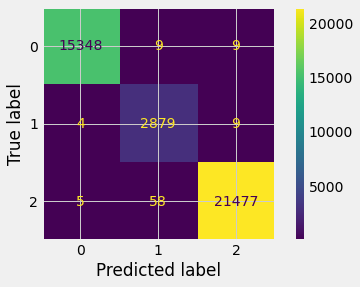

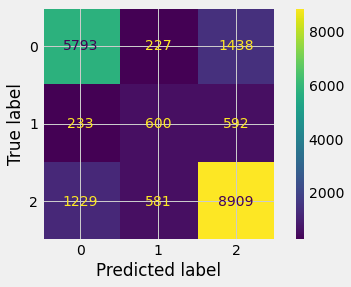

In [55]:
y_hat_train = pipe_rf.predict(X_train)
y_hat_test = pipe_rf.predict(X_test)

print('Evaluation Metrics: Train Data\n')
print(classification_report(y_train,y_hat_train))
print('---------------------------------------------\n')
print('Evaluation Metrics: Test Data\n')
print(classification_report(y_test,y_hat_test))

print(plot_confusion_matrix(pipe_rf,X_train,y_train))
print(plot_confusion_matrix(pipe_rf,X_test,y_test))

In [70]:
param_grid = {
    'rf__n_estimators': [200, 300],
    'rf__criterion': ['gini'],
    'rf__min_samples_split': [4, 6],
    #'rf__min_samples_leaf': [1, 3],
    #'rf__max_features': ['auto', 'sqrt', 'log2']
}

search = GridSearchCV(pipe_rf, param_grid, n_jobs=-1)
search.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.794):
{'rf__criterion': 'gini', 'rf__min_samples_split': 6, 'rf__n_estimators': 200}


#### Second Iteration with updated parameters

In [58]:
# update model based on grid searched parameters

from sklearn.ensemble import RandomForestClassifier

pipe_rf = Pipeline([('trsfm',clmntr),
                    ('sm', SMOTE(random_state = 42)),
                    ('rf',RandomForestClassifier(criterion = 'gini', min_samples_split = 6, n_estimators = 200))])
pipe_rf.fit(X_train,y_train)

Pipeline(steps=[('trsfm',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['funder', 'installer',
                                                   'wpt_name', 'basin',
                                                   'subvillage', 'region',
                                                   'lga', 'ward', 'recorded_by',
                                                   'scheme_management',
                                                   'extraction_type',
                                                   'extraction_type_group',
                                                   'extraction_type_class',
                                                   'management',
                                                   'management_group',
                 

Evaluation Metrics: Train Data

              precision    recall  f1-score   support

           0       0.95      0.92      0.94     15366
           1       0.84      0.86      0.85      2892
           2       0.94      0.96      0.95     21540

    accuracy                           0.94     39798
   macro avg       0.91      0.91      0.91     39798
weighted avg       0.94      0.94      0.94     39798

---------------------------------------------

Evaluation Metrics: Test Data

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      7458
           1       0.43      0.42      0.43      1425
           2       0.82      0.84      0.83     10719

    accuracy                           0.79     19602
   macro avg       0.69      0.68      0.68     19602
weighted avg       0.79      0.79      0.79     19602



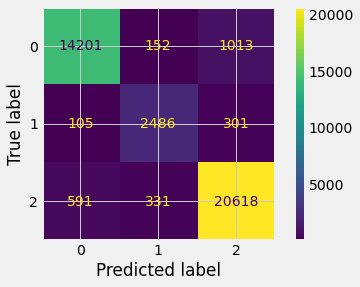

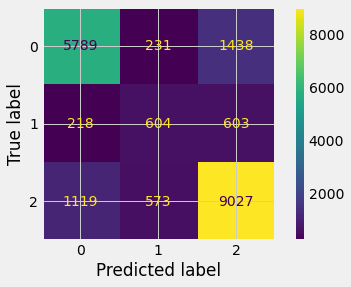

In [59]:
y_hat_train = pipe_rf.predict(X_train)
y_hat_test = pipe_rf.predict(X_test)

print('Evaluation Metrics: Train Data\n')
print(classification_report(y_train,y_hat_train))
print('---------------------------------------------\n')
print('Evaluation Metrics: Test Data\n')
print(classification_report(y_test,y_hat_test))

print(plot_confusion_matrix(pipe_rf,X_train,y_train))
print(plot_confusion_matrix(pipe_rf,X_test,y_test))

In [64]:
param_grid = {
    'rf__n_estimators': [400],
    'rf__criterion': ['gini'],
    'rf__min_samples_split': [6],
    'rf__min_samples_leaf': [1],
    'rf__max_features': ['auto', 'sqrt', 'log2']
}

search = GridSearchCV(pipe_rf, param_grid, n_jobs=-1)
search.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.785):
{'rf__criterion': 'gini', 'rf__max_features': 'auto', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 6, 'rf__n_estimators': 400}


#### Third iteration

In [90]:
pipe_rf = Pipeline([('trsfm',clmntr),
                    ('sm', SMOTE(random_state = 42)),
                    ('rf',RandomForestClassifier(
                        criterion = 'gini', min_samples_split = 6, n_estimators = 400, min_samples_leaf= 1, max_features = 'auto'
                    ))])
pipe_rf.fit(X_train,y_train)

Pipeline(steps=[('trsfm',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['funder', 'installer',
                                                   'wpt_name', 'basin',
                                                   'subvillage', 'region',
                                                   'lga', 'ward', 'recorded_by',
                                                   'scheme_management',
                                                   'extraction_type',
                                                   'extraction_type_group',
                                                   'extraction_type_class',
                                                   'management',
                                                   'management_group',
                 

Evaluation Metrics: Train Data

              precision    recall  f1-score   support

           0       0.95      0.92      0.94     15366
           1       0.84      0.86      0.85      2892
           2       0.94      0.96      0.95     21540

    accuracy                           0.94     39798
   macro avg       0.91      0.92      0.91     39798
weighted avg       0.94      0.94      0.94     39798

---------------------------------------------

Evaluation Metrics: Test Data

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      7458
           1       0.43      0.42      0.42      1425
           2       0.81      0.84      0.83     10719

    accuracy                           0.79     19602
   macro avg       0.68      0.68      0.68     19602
weighted avg       0.79      0.79      0.79     19602



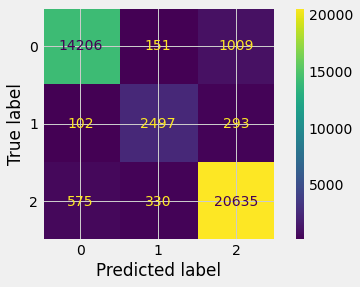

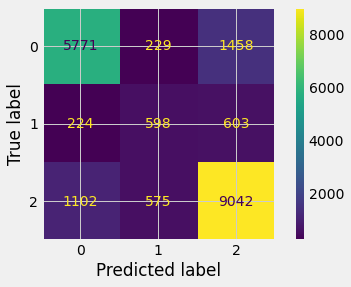

In [91]:
y_hat_train = pipe_rf.predict(X_train)
y_hat_test = pipe_rf.predict(X_test)

print('Evaluation Metrics: Train Data\n')
print(classification_report(y_train,y_hat_train))
print('---------------------------------------------\n')
print('Evaluation Metrics: Test Data\n')
print(classification_report(y_test,y_hat_test))

print(plot_confusion_matrix(pipe_rf,X_train,y_train))
print(plot_confusion_matrix(pipe_rf,X_test,y_test))

### Just testing

In [68]:
pipe_rf = Pipeline([('trsfm',clmntr),
                    ('sm', SMOTE(random_state = 42)),
                    ('rf',RandomForestClassifier(
                        random_state = 42, criterion = 'entropy', min_samples_split = 7, n_estimators = 200, max_features = 'auto'
                    ))])
pipe_rf.fit(X_train,y_train)

Pipeline(steps=[('trsfm',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['funder', 'installer',
                                                   'wpt_name', 'basin',
                                                   'subvillage', 'region',
                                                   'lga', 'ward', 'recorded_by',
                                                   'scheme_management',
                                                   'extraction_type',
                                                   'extraction_type_group',
                                                   'extraction_type_class',
                                                   'management',
                                                   'management_group',
                 

Evaluation Metrics: Train Data

              precision    recall  f1-score   support

           0       0.95      0.91      0.93     15366
           1       0.81      0.85      0.83      2892
           2       0.93      0.95      0.94     21540

    accuracy                           0.93     39798
   macro avg       0.90      0.90      0.90     39798
weighted avg       0.93      0.93      0.93     39798

---------------------------------------------

Evaluation Metrics: Test Data

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      7458
           1       0.43      0.43      0.43      1425
           2       0.81      0.84      0.83     10719

    accuracy                           0.79     19602
   macro avg       0.69      0.68      0.68     19602
weighted avg       0.79      0.79      0.79     19602



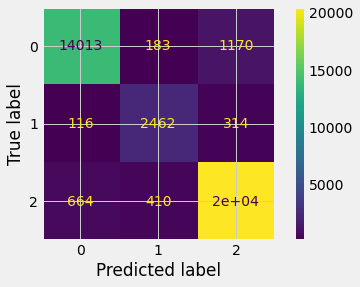

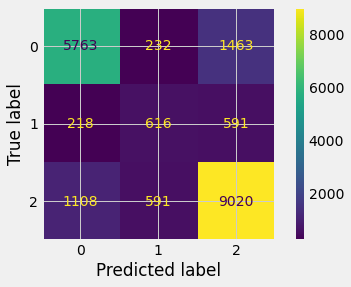

In [69]:
y_hat_train = pipe_rf.predict(X_train)
y_hat_test = pipe_rf.predict(X_test)

print('Evaluation Metrics: Train Data\n')
print(classification_report(y_train,y_hat_train))
print('---------------------------------------------\n')
print('Evaluation Metrics: Test Data\n')
print(classification_report(y_test,y_hat_test))

print(plot_confusion_matrix(pipe_rf,X_train,y_train))
print(plot_confusion_matrix(pipe_rf,X_test,y_test))

### Feature Importances

In [73]:
len(pipe_rf.steps[2][1].feature_importances_)

1004

In [74]:
X_train.shape[1]

37

In [75]:
pipe_rf.steps[0][1].get_feature_names

<bound method ColumnTransformer.get_feature_names of ColumnTransformer(transformers=[('ohe',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['funder', 'installer', 'wpt_name', 'basin',
                                  'subvillage', 'region', 'lga', 'ward',
                                  'recorded_by', 'scheme_management',
                                  'extraction_type', 'extraction_type_group',
                                  'extraction_type_class', 'management',
                                  'management_group', 'payment', 'payment_type',
                                  'water_quality', 'quality_group', 'quantity',
                                  'quantity_group', 'source', 'source_type',
                                  'source_class', 'waterpoint_type',
                                  'waterpoint_type_group']),
                                (

In [76]:
feature_names = list(pipe_rf.named_steps['trsfm'].transformers_[0][1].get_feature_names())
feature_names

['x0_0',
 'x0_Adb',
 'x0_Adra',
 'x0_African',
 'x0_Aict',
 'x0_Amref',
 'x0_Anglican Church',
 'x0_Bsf',
 'x0_Caritas',
 'x0_Cdtf',
 'x0_Cefa',
 'x0_Ces (gmbh)',
 'x0_Ces(gmbh)',
 'x0_China Government',
 'x0_Cmsr',
 'x0_Co',
 'x0_Cocen',
 'x0_Commu',
 'x0_Community',
 'x0_Conce',
 'x0_Concern',
 'x0_Concern World Wide',
 'x0_Danida',
 'x0_Ded',
 'x0_Dfid',
 'x0_Dh',
 'x0_Dhv',
 'x0_District Council',
 'x0_Dmdd',
 'x0_Dwe',
 'x0_Dwe/norad',
 'x0_Dwsp',
 'x0_Fin Water',
 'x0_Fini Water',
 'x0_Finida German Tanzania Govt',
 'x0_Finw',
 'x0_Fw',
 'x0_Gen',
 'x0_Germany',
 'x0_Germany Republi',
 'x0_Go',
 'x0_Government Of Tanzania',
 'x0_Grumeti',
 'x0_Gtz',
 'x0_H',
 'x0_Halmashauri Ya Wilaya Sikonge',
 'x0_He',
 'x0_Hesawa',
 'x0_Hifab',
 'x0_Hsw',
 'x0_Idara Ya Maji',
 'x0_Idc',
 'x0_Ir',
 'x0_Irish Ai',
 'x0_Is',
 'x0_Isf',
 'x0_Jaica',
 'x0_Japan',
 'x0_Jica',
 'x0_Kaemp',
 'x0_Ki',
 'x0_Kibaha Town Council',
 'x0_Kilindi District Co',
 'x0_Kiliwater',
 'x0_Kirde',
 'x0_Kkkt',
 'x0_K

In [77]:
feature_names = feature_names + pipe_rf.named_steps['trsfm'].transformers_[1][2]

In [81]:
feature_dict = dict(zip(feature_names,pipe_rf.steps[2][1].feature_importances_))
feature_dict

{'x0_0': 0.0004920213365409805,
 'x0_Adb': 0.0007261961481224523,
 'x0_Adra': 0.0005069858242298091,
 'x0_African': 0.0003196296322109759,
 'x0_Aict': 0.00011333053002714201,
 'x0_Amref': 0.0003667053079551232,
 'x0_Anglican Church': 0.00014012297628476908,
 'x0_Bsf': 0.0003055396166058973,
 'x0_Caritas': 0.00016732187630170476,
 'x0_Cdtf': 3.766570043340378e-05,
 'x0_Cefa': 3.78371683043466e-05,
 'x0_Ces (gmbh)': 0.00011360559493882266,
 'x0_Ces(gmbh)': 0.0001954983345882904,
 'x0_China Government': 2.5843316899180298e-05,
 'x0_Cmsr': 6.109155819639282e-05,
 'x0_Co': 0.00017831055333313473,
 'x0_Cocen': 7.015056284958943e-05,
 'x0_Commu': 0.00023703812035747688,
 'x0_Community': 0.00027602587376262855,
 'x0_Conce': 7.74352925971415e-05,
 'x0_Concern': 0.00024239738433288146,
 'x0_Concern World Wide': 0.00021223306447435734,
 'x0_Danida': 0.002532792049561449,
 'x0_Ded': 0.0005821272711943136,
 'x0_Dfid': 5.975526759908578e-05,
 'x0_Dh': 0.00019208322527987577,
 'x0_Dhv': 0.00108909568

In [85]:
feature_dict_sorted = {k: v for k, v in sorted(feature_dict.items(), key=lambda item: item[1], reverse = True)}
feature_dict_sorted

{'longitude': 0.07926789149826924,
 'latitude': 0.07701716510059167,
 'x19_dry': 0.028662558124651842,
 'x20_dry': 0.026484044425246125,
 'x19_enough': 0.015314815520167524,
 'amount_tsh': 0.015253636411610122,
 'x20_enough': 0.015126181429798408,
 'x7_other': 0.01492671810595513,
 'x2_other': 0.012390608398098645,
 'x1_DWE': 0.011237295783764862,
 'x19_insufficient': 0.010809683306728119,
 'x20_insufficient': 0.010530912783990853,
 'x15_never pay': 0.009639258295688773,
 'x4_other': 0.009478093079713342,
 'x24_communal standpipe': 0.009295400437502543,
 'x0_Government Of Tanzania': 0.009229362501330107,
 'x16_never pay': 0.009135282325607761,
 'x0_other': 0.008852717917789724,
 'x24_other': 0.00850641774560268,
 'x24_communal standpipe multiple': 0.007985929436139752,
 'x12_other': 0.007967084119274184,
 'x1_other': 0.007951888811603766,
 'x11_other': 0.00793928197366889,
 'x25_other': 0.007904412633311984,
 'x9_VWC': 0.007863256169525934,
 'x10_other': 0.0077359841364538886,
 'x13_vw

In [88]:
names = list(feature_dict_sorted.keys())[:19]
vals = list(feature_dict_sorted.values())[:19]

AttributeError: 'AxesSubplot' object has no attribute 'set_x_label'

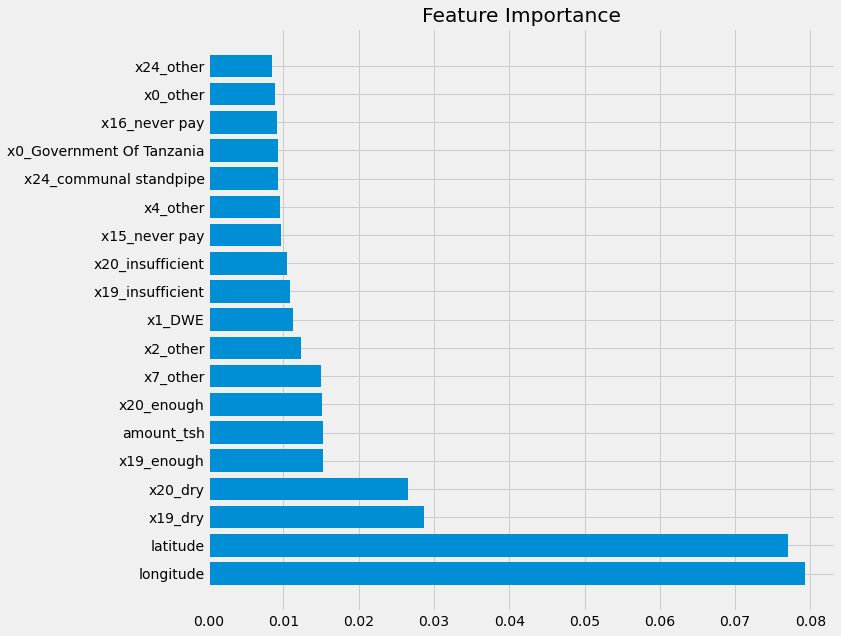

In [97]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10,10))
plt.barh(names, vals)
plt.title('Feature Importance')
ax.set_x_label('Feature Weights')
ax.set_y_label('Features')

In [168]:
def plot_feature_importances(model):
    n_features = feature_names
    plt.figure(figsize=(8,8))
    plt.barh(feature_dict_sorted, align='center') 
    #plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(pipe_rf.steps[1][1])

TypeError: barh() missing 1 required positional argument: 'width'

<Figure size 576x576 with 0 Axes>

In [75]:
plot_feature_importances(y_hat_test)

NameError: name 'plot_feature_importances' is not defined

### Bagging Classifier

In [71]:
from sklearn.ensemble import BaggingClassifier

pipe_bag = Pipeline([('trsfm',clmntr),('bag',BaggingClassifier())])#
pipe_bag.fit(X_train,y_train)

Pipeline(steps=[('trsfm',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['basin', 'region', 'lga',
                                                   'scheme_management',
                                                   'extraction_type',
                                                   'extraction_type_group',
                                                   'extraction_type_class',
                                                   'management',
                                                   'management_group',
                                                   'payment', 'payment_type',
                                                   'water_quality',
                                                   'quality_group', 'quantity',
                

Evaluation Metrics: Train Data

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     15366
           1       0.95      0.92      0.94      2892
           2       0.98      0.98      0.98     21540

    accuracy                           0.98     39798
   macro avg       0.97      0.96      0.97     39798
weighted avg       0.98      0.98      0.98     39798

---------------------------------------------

Evaluation Metrics: Test Data

              precision    recall  f1-score   support

           0       0.77      0.78      0.78      7458
           1       0.42      0.39      0.40      1425
           2       0.81      0.82      0.82     10719

    accuracy                           0.77     19602
   macro avg       0.67      0.66      0.67     19602
weighted avg       0.77      0.77      0.77     19602



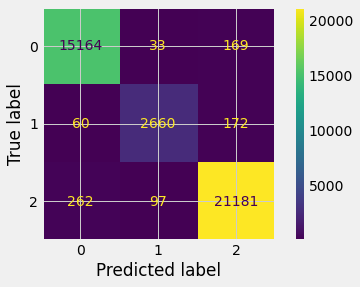

In [72]:
y_hat_train = pipe_bag.predict(X_train)
y_hat_test = pipe_bag.predict(X_test)

print('Evaluation Metrics: Train Data\n')
print(classification_report(y_train,y_hat_train))
print('---------------------------------------------\n')
print('Evaluation Metrics: Test Data\n')
print(classification_report(y_test,y_hat_test))

plot_confusion_matrix(pipe_bag,X_train,y_train)

In [ ]:
param_grid = {
    'rf__n_neighbors': [15],
    'rf__weights': ['distance'],
    'rf__leaf_size': [40],
    'rf__p': [1]
}

search = GridSearchCV(pipe_bag, param_grid, n_jobs=-1)
search.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

### Gradient Boosting

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_validate


clfs = []
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier(n_jobs = 8))
clfs.append(GradientBoostingClassifier())

for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, y_train)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())

NameError: name 'pipeline' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_validate


clfs = []
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier(n_jobs = 8))
clfs.append(GradientBoostingClassifier())

for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, y_train)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())